# Breast Cancer Dataset

Here is an example Python notebook that demonstrates how to train and evaluate a decision tree classifier on the breast cancer dataset and analyzes the impact of overfitting based on the training and testing accuracy. The notebook uses scikit-learn, a popular Python machine learning library, to load and preprocess the data and train the decision tree model.




*   **mean_radius: mean of distances from center to points on the perimeter**

*   **mean_texture: standard deviation of gray-scale values**


*   **mean_perimeter: mean size of the core tumor**

*   **mean_area: mean area of the tumor**
*   **mean_smoothness: mean of local variation in radius lengths**





In [ ]:
import numpy as np                                              # import numpy library and give it an alias "np"
import pandas as pd                                             # import pandas library and give it an alias "pd"
from sklearn import tree                                        # import the tree module from scikit-learn library
from sklearn.model_selection import train_test_split            # import the train_test_split module from scikit-learn library
from sklearn.model_selection import GridSearchCV                # import the GridSearchCV module from scikit-learn library
from sklearn.metrics import accuracy_score, confusion_matrix    # import the accuracy_score and confusion_matrix modules from scikit-learn library
import matplotlib.pyplot as plt

In [ ]:
# Load the data from a CSV file
df=pd.read_csv('/content/Breast_cancer_data.csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [ ]:
# Check the number of missing values in the dataset
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [ ]:
# Extract the feature values (X) and target variable (Y) from the `data` DataFrame
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [ ]:
# Split the dataset into training and testing sets using the `train_test_split()` function from scikit-learn
from sklearn.model_selection import train_test_split
x_train  , x_test, y_train, y_test =train_test_split(X ,Y , test_size=0.3, stratify=Y)

In [ ]:
# Import the `DecisionTreeClassifier` class from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Create a `DecisionTreeClassifier` object with hyperparameters
classifier = DecisionTreeClassifier()

# Train the `DecisionTreeClassifier` object on the training data
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
feature_list = ['mean_radius','mean_texture	','mean_perimeter','mean_area','mean_smoothness']
feature_list

['mean_radius',
 'mean_texture\t',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness']

In [ ]:
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X, Y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6, 8]})

In [ ]:
# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}
Best score:  0.9191585157584227


In [ ]:
# Import the `DecisionTreeClassifier` class from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Create a `DecisionTreeClassifier` object with hyperparameters
clf= DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3, min_samples_split=2)

# Train the `DecisionTreeClassifier` object on the training data
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 9 (	) missing from current font.
  ann.update_bbox_position_size(renderer)


[Text(0.5231481481481481, 0.9285714285714286, 'mean_perimeter <= 96.59\nentropy = 0.952\nsamples = 398\nvalue = [148, 250]'),
 Text(0.23148148148148148, 0.7857142857142857, 'mean_smoothness <= 0.09\nentropy = 0.506\nsamples = 268\nvalue = [30, 238]'),
 Text(0.07407407407407407, 0.6428571428571429, 'mean_area <= 558.25\nentropy = 0.07\nsamples = 120\nvalue = [1, 119]'),
 Text(0.037037037037037035, 0.5, 'entropy = 0.0\nsamples = 94\nvalue = [0, 94]'),
 Text(0.1111111111111111, 0.5, 'mean_radius <= 13.65\nentropy = 0.235\nsamples = 26\nvalue = [1, 25]'),
 Text(0.07407407407407407, 0.35714285714285715, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.14814814814814814, 0.35714285714285715, 'entropy = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(0.3888888888888889, 0.6428571428571429, 'mean_texture\t <= 21.16\nentropy = 0.714\nsamples = 148\nvalue = [29, 119]'),
 Text(0.25925925925925924, 0.5, 'mean_perimeter <= 73.23\nentropy = 0.472\nsamples = 119\nvalue = [12, 107]'),
 Text(0.2222

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


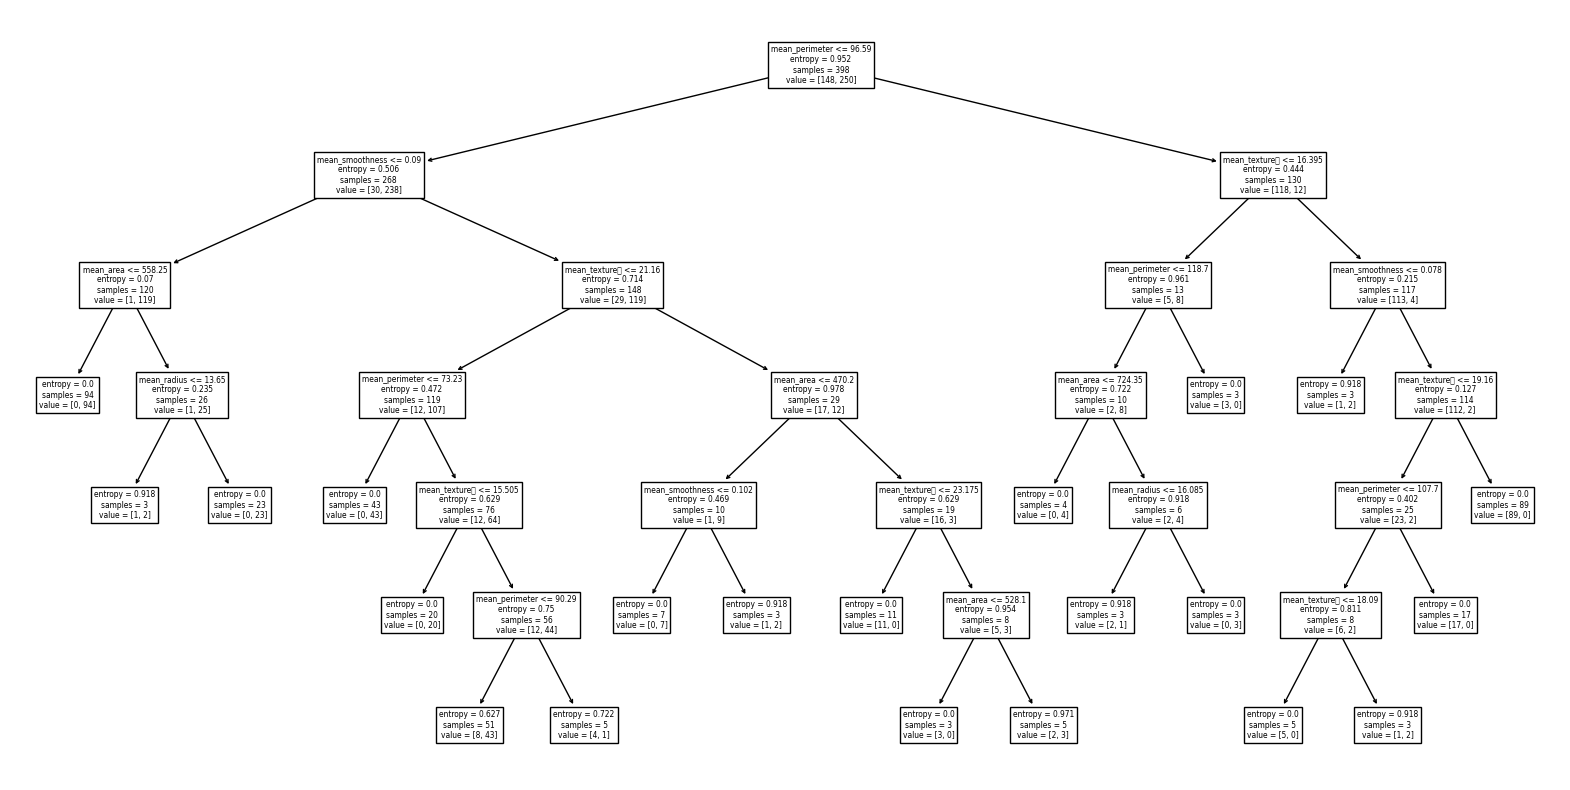

In [ ]:
# Plot the decision tree using the `plot_tree()` function from scikit-learn
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=feature_list)


In [ ]:
# Use the trained `DecisionTreeClassifier` object to make predictions on the test data
y_pred = clf.predict(x_test)

# Compute the confusion matrix to evaluate the performance of the model on the test data
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix to the console
print(cm)

# Compute the accuracy of the model on the test data
accuracy_score(y_test, y_pred)

[[51 13]
 [ 9 98]]


0.8713450292397661

In [ ]:
# Use the trained `DecisionTreeClassifier` object to make predictions on the train data
y_pred = clf.predict(x_train)

# Compute the confusion matrix to evaluate the performance of the model on the train data
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_train, y_pred)

# Print the confusion matrix to the console
print(cm)

# Compute the accuracy of the model on the train data
accuracy_score(y_train, y_pred)

[[134  14]
 [  2 248]]


0.9597989949748744

In [ ]:
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_scores = []
test_scores = []

In [ ]:
for depth in max_depths:
    # Create a new instance of a DecisionTreeClassifier with
    # the current value of "max_depth" set to "depth".
    clf = DecisionTreeClassifier(max_depth=depth)
    
    # Train the model on the training data.
    clf.fit(x_train, y_train)
    
    # Compute the accuracy of the model on both the training
    # data and the test data.
    train_scores.append(accuracy_score(y_train, clf.predict(x_train)))
    test_scores.append(accuracy_score(y_test, clf.predict(x_test)))

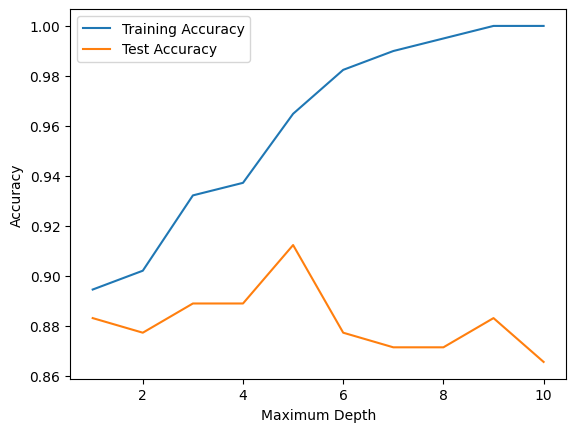

In [ ]:
plt.plot(max_depths, train_scores, label='Training Accuracy')
plt.plot(max_depths, test_scores, label='Test Accuracy')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()